# USE jupyter notebook, pandas

! installing: https://www.dataquest.io/blog/jupyter-notebook-tutorial/
              https://realpython.com/jupyter-notebook-introduction/
              
! shortkey: https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330

! pandas :  https://nordiccoder.com/blog/python-pandas-excel-la-gi-cac-vi-du/

1. get excel file to python (read_excel)
2. get excell_info (sheet_name...)
3. 

In [249]:
import pandas as pd

movies_excel_file = 'movies.xls'
movies_data = pd.read_excel(movies_excel_file) 
movies_sheet1= pd.read_excel(movies_excel_file,sheet_name=2,index_col=1) 
excel_file_info = pd.ExcelFile(movies_excel_file) 
"""get all excel file information"""

file_sheet_names = excel_file_info.sheet_names
# for name in file_sheet_names: print(name)
#     print(name)
print(file_sheet_names)


['1900s', '2000s', '2010s']


Define sheet number, and get data from every sheet then merge by concat!

In [360]:
movies = None
_movies_sheets = []
for key, move_sheet in enumerate(file_sheet_names):
    movies_sheet = pd.read_excel(movies_excel_file, sheet_name=key, index_col=0)
    _movies_sheets.append(movies_sheet)    

movies = pd.concat(_movies_sheets)
# print(len(movies_sheets))
# columns, rows
print(movies.shape)
# print(movies.tail())

(5042, 24)


!!! ExcelFile vs read_excell
Với ExcelFile, bạn chỉ cần truyền tệp Excel một lần và sau đó bạn có thể sử dụng tệp đó để lấy DataFrames. Khi sử dụng read_excel, bạn chuyển tệp Excel mỗi lần và do đó tệp được tải lại cho mỗi trang tính.

In [250]:
"""Sort data"""
sort_by_gross = movies.sort_values ('Gross Earnings', ascending=False)
# print (sort_by_gross.head(3))
print(sort_by_gross["Gross Earnings"].head(5))

Title
Avatar             760505847.0
Titanic            658672302.0
Jurassic World     652177271.0
The Avengers       623279547.0
The Avengers 2     623279547.0
Name: Gross Earnings, dtype: float64


Write plot for data excell


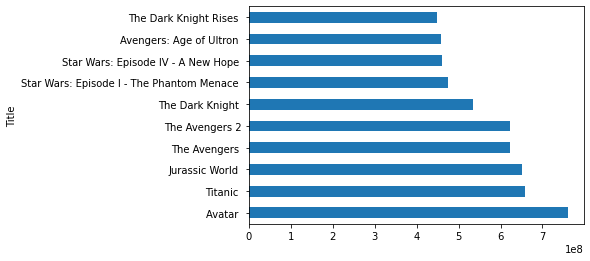

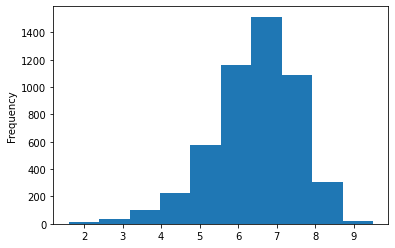

In [251]:
import matplotlib.pyplot as plt 

sort_by_gross['Gross Earnings'].head(10).plot(kind='barh')
plt.show()


movies['IMDB Score'].plot(kind='hist')
plt.show()



In [243]:
"""create statics"""
import math

def round_up(n, decimal=0):
    multiple  = 10**decimal
    return math.ceil(n*multiple)/multiple

# movies.describe()
revenue  = movies["Gross Earnings"].mean()
# print(round_up(revenue,2))
# movies['Budget'].mean()

In [325]:
movies_skip_rows_cols = pd.read_excel('movies.xls')
print(movies_skip_rows_cols.head(3))
print('\n', "*"*100, '\n')
"""Skip 5 rows"""
movies_skip_rows_cols = pd.read_excel('movies.xls', skiprows=3)
movies_skip_rows_cols.head(2)


                                               Title  Year             Genres  \
0  Intolerance: Love's Struggle Throughout the Ages   1916  Drama|History|War   
1                    Over the Hill to the Poorhouse   1920        Crime|Drama   
2                                    The Big Parade   1925  Drama|Romance|War   

  Language Country Content Rating  Duration  Aspect Ratio    Budget  \
0      NaN     USA      Not Rated       123          1.33  385907.0   
1      NaN     USA            NaN       110          1.33  100000.0   
2      NaN     USA      Not Rated       151          1.33  245000.0   

   Gross Earnings  ... Facebook Likes - Actor 1 Facebook Likes - Actor 2  \
0             NaN  ...                      436                       22   
1       3000000.0  ...                        2                        2   
2             NaN  ...                       81                       12   

  Facebook Likes - Actor 3 Facebook Likes - cast Total  \
0                      9.0 

,The Big Parade,1925,Drama|Romance|War,Unnamed: 3,USA,Not Rated,151,1.33,245000,Unnamed: 9,...,81,12,6,108,226,0,4849,45,48,8.3
0,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
1,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


create sub-/ child table with a acouple of columns
    

In [326]:
movies_skip_rows_cols.columns = ['Title', 'Year', 'Genres', 'Language', 'Country', 
                            'Content Rating', 'Duration', 'Aspect Ratio', 'Budget',
                            'Gross Earnings', 'Director', 'Actor 1', 'Actor 2',
                            'Actor 3', 'Facebook Likes - Director', 'Facebook Likes - Actor 1',
                            'Facebook Likes - Actor 2', 'Facebook Likes - Actor 3', 
                            'Facebook Likes - cast Total', 'Facebook likes - Movie', 'Facenumber in posters',
                            'User Votes', 'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score']
movies_skip_rows_cols.index +=1
movies_skip_rows_cols.head()

# movies_subset_columns = pd.read_excel(movies_excel_file, parse_cols=6)

# movies_subset_columns.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
2,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0
3,The Broadway Melody,1929,Musical|Romance,English,USA,Passed,100,1.37,379000.0,2808000.0,...,77,28,4.0,109,167,8,4546,71,36.0,6.3
4,Hell's Angels,1930,Drama|War,English,USA,Passed,96,1.20,3950000.0,NaN,...,431,12,4.0,457,279,1,3753,53,35.0,7.8
5,A Farewell to Arms,1932,Drama|Romance|War,English,USA,Unrated,79,1.37,800000.0,NaN,...,998,164,99.0,1284,213,1,3519,46,42.0,6.6


    Formular in col

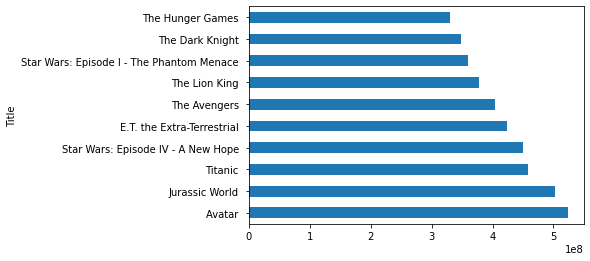

In [327]:
movies["Net Earnings"] = movies["Gross Earnings"] - movies["Budget"]
# movies.head()

# sort_movies = movies[['Net Earnings']].sort_values(['Net Earnings'], ascending=[True])
# sort_movies.head(15)['Net Earnings'].plot.barh()
# plt.show()


sorted_movies = movies[['Net Earnings']].sort_values(['Net Earnings'], ascending=[False])
sorted_movies.head(10)['Net Earnings'].plot.barh()
plt.show()


Create sub-set/ pivot column -> reference/ statics table



In [336]:
sub_table_earning = movies[['Year','Gross Earnings']]
# sub_table.columns = [1,2]
sub_table_earning.head(3)

"""pivot indexing by Year"""
pivot_earning_by_year = sub_table_earning.pivot_table(index =['Year'])
pivot_earning_by_year.head(5)

,Gross Earnings
Year,
1920.0,3000000.0
1927.0,26435.0
1929.0,1408975.0
1933.0,2300000.0
1935.0,3000000.0


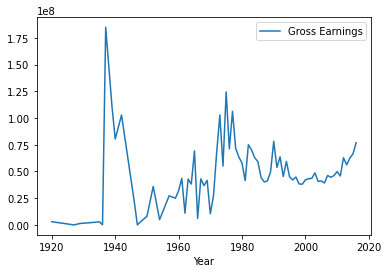

In [352]:
pivot_earning_by_year.plot()
plt.show()

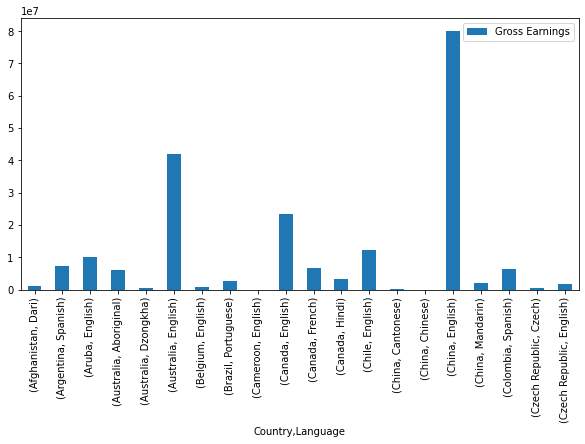

In [350]:
"""Pivot More columns"""
sub_set_multi_col = movies[['Country', 'Language','Gross Earnings']]
sub_set_multi_col.head(20)
pivot_table_muti_index = sub_set_multi_col.pivot_table(index=['Country', 'Language'])
pivot_to_plotting = pivot_table_muti_index.head(20)
pivot_to_plotting.plot(kind='bar', figsize=(10,5))
plt.show()



# Export excell pandas to Excel files Object.to_exel.xlsx

In [393]:
import uuid
data_frame_to_export = pivot_to_plotting

# def create_excel_file(data_frame_to_export):
#     try:
#         fname ='output-'+str(uuid.uuid4())+'.xlsx'
#         data_frame_to_export.to_excel(fname)
#         print(f'file {fname} is printed out')
#     except:
#         print(f'file {fname} is NOT printed out')
data_frame_to_export.to_excel('output.xlsx')


# fname = 'output-64b52eba-a7e7-4aa6-bde5-f975115d6677.xlsx'
# file_excel_output = pd.read_excel(fname)
# file_excel_output.shape
# file_excel_output.plot(kind='bar')
# plt.show()
# file_excel_output.index +=1
# file_excel_output['Country'].head(20)
# file_excel_output[['Country', 'Language']].head(20)

# Advance excel export__  xlsxwriter

In [398]:



# writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')
# movies.to_excel(writer, index=False, sheet_name='report')
# workbook = writer.bookworksheet = writer.sheets['report']


# header_fmt = workbook.add_format({'bold': True})
# worksheet.set_row(0, None, header_fmt)

In [421]:
web_start = {
    'Day' : [0, 2, 4, 6, 8],
    'Visitor' : [1, 3 , 5, 7, 9 ],
    'Bounce Day' : [12, 5 , 1, 1, 6 ]
}
df = pd.DataFrame(web_start)
df.index +=1
df.head(2)
# df.tail(2)
df.set_index('Day')
# df.head()
# print(df['Visitor'])
df[['Day','Visitor']]
df.Visitor.tolist()
df

,Day,Visitor,Bounce Day
1,0,1,12
2,2,3,5
3,4,5,1
4,6,7,1
5,8,9,6


# change matrix array to DataFrame

In [423]:
import numpy as np
array_np_to_df = pd.DataFrame(np.array(df[['Day','Visitor']]))
print(array_np_to_df)


   0  1
0  0  1
1  2  3
2  4  5
3  6  7
4  8  9


# change DataFrame to  matrix array


In [427]:
arr = np.array(df[['Day','Visitor']])
print(arr)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
